In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(0)

figsize = (10,6)

100%|██████████| 20000/20000 [00:06<00:00, 3327.54it/s]


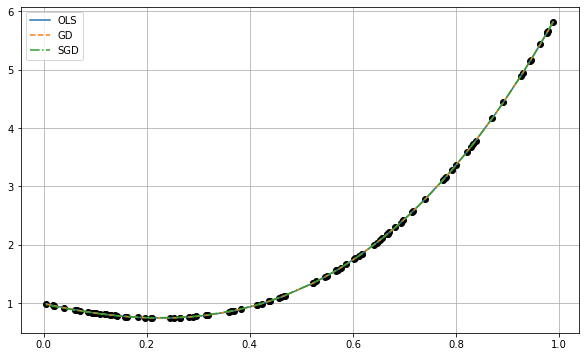

MSE:
OLS: 0.0000
GD : 0.0000
SGD: 0.0000

Coefficients:
OLS:  [ 1. -2.  3.  4.]
GD :  [ 0.99558424 -1.9481069   2.87515097  4.08065612]
SGD:  [ 0.98260528 -1.8147577   2.57787708  4.26227155]
Given coefficients :  [ 1 -2  3  4]


In [2]:
# A plain gradient descent with a fixed learning rate (you will need to tune
# it).
""" Compare OLS and Gradient Descrent (GD) """
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

""" Make data """
x_rand = np.random.rand(100) # random dist x
sorter = x_rand.argsort()
x      = x_rand[sorter[::-1]] # sorted x
i
beta = np.array([1, -2, 3, 4])
f = lambda x : beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3 #+ np.random.normal(0, .01, x.shape)
y      = f(x)
y_rand = f(x_rand)

fig, ax = plt.subplots(figsize=figsize) # plot data
ax.plot(x, y, 'ko')

""" OLS """
n_order = 4
X = np.zeros((len(x),n_order)) # Design matrix
X_rand = np.zeros((len(x_rand),n_order)) # Design matrix
for i in range(n_order):
    X[:,i]      = x**i
    X_rand[:,i] = x_rand**i

beta_m_OLS = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
ytilde_OLS = X @ beta_m_OLS

# sort arrays in increasing order of x
#ytilde_OLS = ytilde_OLS[sorter[::-1]]

ax.plot(x, ytilde_OLS, label='OLS')

""" Gradient descent """
n   = len(x)
N   = 100000
eta = 1e-2      # learning rate
dC = lambda beta, X, y : 2/n*X.T@(X@beta - y)
beta_GD = np.random.randn(4)

for i in range(N):
    beta_GD -= eta*dC(beta_GD, X, y)

ytilde_GD = X @ beta_GD

ax.plot(x, ytilde_GD, '--', label='GD')

""" Stochastic Gradient Descrent """
M = 5               # size of each minibatch
n_epochs = N//M     # keep number of iterations the same 
m = int(n/M)        # number of minibatches
eta = 1e-1          # learning rate

beta_SGD = np.random.randn(4)

for epoch in tqdm(range(n_epochs)):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X_rand[random_index:random_index+M]
        yi = y_rand[random_index:random_index+M] 
        gradients = (1.0/M)*dC(beta_SGD, xi, yi)
        beta_SGD = beta_SGD - eta*gradients

ytilde_SGD = X @ beta_SGD
        
ax.plot(x, ytilde_SGD, '-.', label='SGD')
ax.legend(); ax.grid()
plt.show()

print("MSE:")
print("OLS: %.4f" % mean_squared_error(y, ytilde_OLS))
print("GD : %.4f" % mean_squared_error(y, ytilde_GD))
print("SGD: %.4f" % mean_squared_error(y, ytilde_SGD))
print("\nCoefficients:")
print("OLS: ", beta_m_OLS)
print("GD : ", beta_GD)
print("SGD: ", beta_SGD)
print("Given coefficients : ", beta)

100%|██████████| 999999/999999 [00:29<00:00, 34119.66it/s]


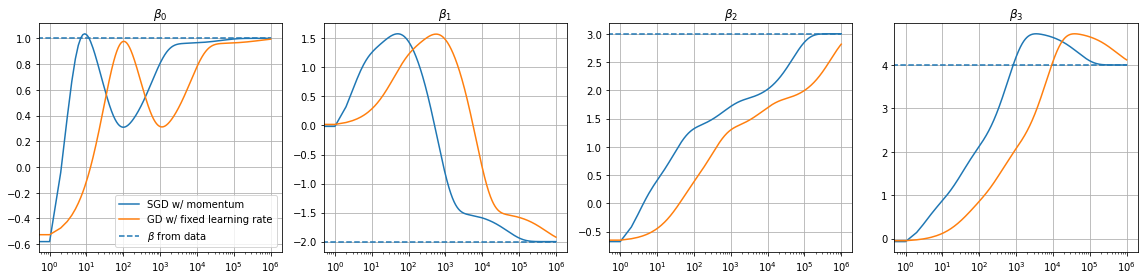

In [3]:
# Add momentum to the plain GD code and compare convergence with a 
# fixed learning rate (you may need to tune the learning rate
""" Gradient descent with momentum """
n   = len(x)
N   = 1000000
eta = 1e-1      # learning rate
gamma = 1e-1     # momentum rate

dC = lambda beta : 2/n*X.T@(X@beta - y)
dC_SGD = lambda beta : 2/n*X_rand.T@(X_rand@beta - y_rand)

v = np.zeros((4,N))
beta_SGD = np.zeros((4, N))
init_value = np.random.randn(4)
beta_SGD[:,0] = init_value

""" Gradient descrent w/ fixed learning rate """
eta_GD = 1e-2      # learning rate

beta_GD = np.zeros((4,N))
beta_GD[:,0] = init_value

for i in tqdm(range(N-1)):
    # SDG
    beta_SGD[:,i+1] = beta_SGD[:,i] - v[:,i]
    v[:,i+1] = gamma*v[:,i] + eta*dC_SGD(beta_SGD[:,i+1])
    
    # GD
    beta_GD[:,i+1] = beta_GD[:,i] - eta_GD*dC(beta_GD[:,i])

fig, ax = plt.subplots(ncols=4, figsize=(16,4))
ax[0].plot(beta_SGD[0], label='SGD w/ momentum')
ax[0].plot(beta_GD[0], label='GD w/ fixed learning rate')
ax[0].hlines(beta[0], 0, N, ls='--', label=r'$\beta$ from data')
ax[0].set_title(r"$\beta_0$")
ax[0].legend()

ax[1].plot(beta_SGD[1])
ax[1].plot(beta_GD[1])
ax[1].hlines(beta[1], 0, N, ls='--')
ax[1].set_title(r"$\beta_1$")

ax[2].plot(beta_SGD[2])
ax[2].plot(beta_GD[2])
ax[2].hlines(beta[2], 0, N, ls='--')
ax[2].set_title(r"$\beta_2$")

ax[3].plot(beta_SGD[3])
ax[3].plot(beta_GD[3])
ax[3].hlines(beta[3], 0, N, ls='--')
ax[3].set_title(r"$\beta_3$");

[[axi.set_xscale("log"), axi.grid()] for axi in ax];
plt.tight_layout()
plt.savefig("figures/beta_convergence_rate.pdf")

100%|██████████| 20000/20000 [00:05<00:00, 3463.28it/s]


SGD w/ minibatches:  [ 0.75906384 -0.90284117  2.67855125  3.19716992]
Data              :  [ 1 -2  3  4]


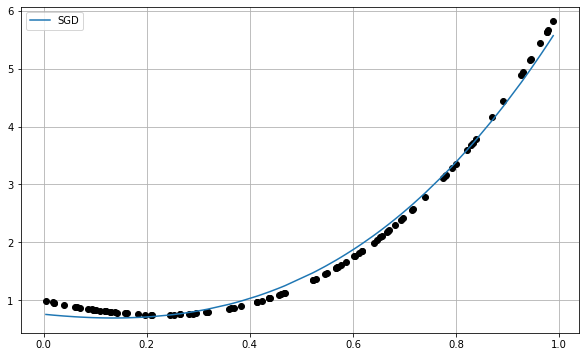

In [4]:
# Repeat these steps for stochastic gradient descent with mini batches and
# a given number of epochs. Use a tunable learning rate as discussed in
# the lectures from week 39. Discuss the results as functions of the various
# parameters (size of batches, number of epochs etc)
""" B """

#chosen_datapoints = np.random.choice(len(x), size=20, replace=False)

n_epochs = 20000
M = 5             # size of each minibatch
n = len(x)        # number of datapoints
m = int(n/M)      # number of minibatches

t0, t1 = 10, 50
def learning_schedule(t):
    return t0/(t+t1)

beta_SGD = np.random.randn(4)

for epoch in tqdm(range(n_epochs)):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X_rand[random_index:random_index+M]
        yi = y_rand[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ beta_SGD)-yi)
        eta = learning_schedule(epoch*m+i) # <- use tuneable learning rate here
        beta_SGD = beta_SGD - eta*gradients

print("SGD w/ minibatches: ", beta_SGD)
print("Data              : ", beta)

fig, ax = plt.subplots(figsize=figsize) # plot data
ax.plot(x, y, 'ko') # data

ytilde_SGD = X @ beta_SGD # result
ax.plot(x, ytilde_SGD, label='SGD') 
ax.legend(); ax.grid()
plt.show()

100%|██████████| 2000/2000 [00:19<00:00, 102.53it/s]


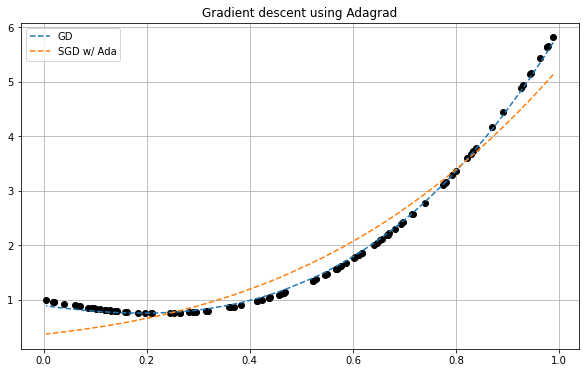

Beta GD  : [ 0.8899678  -1.30236027  2.18791342  4.12578495]
Beta SGD : [0.36199762 1.01648864 1.79468422 2.0873782 ]
Beta     : [ 1 -2  3  4]


In [5]:
# Implement the Adagrad method in order to tune the learning rate. Do
# this with and without momentum for plain gradient descent and SGD.
from autograd import grad
""" Define cost function and derivate """
lmbda = 0.1
C = lambda beta, X, y : (y - X@beta).T@(y - X@beta) + lmbda*beta.T@beta

C_grad = grad(C)

""" Gradient descent with and without momentum using autograd """
""" -> Plain gradient descent """
n   = len(x)
N   = 10000
eta = 1e-3      # learning rate

beta_GD = np.array([1., 1., 1., 1.])

for i in tqdm(range(N)):
    beta_GD -= eta*C_grad(beta_GD, X, y)

""" -> Stochastic gradient descent """
M = 5            # size of each minibatch
n_epochs = N//M  # 
m = int(n/M)     # number of minibatches
eta = 1e1       # learning rate
delta  = 1e-8

#beta_SGD = np.zeros((4,N))
#beta_SGD[:,0] = init_value
beta_SGD = np.array([1., 1., 1., 1.]) #np.random.randn(4)

# Including AdaGrad parameter to avoid possible division by zero
for epoch in tqdm(range(n_epochs)):
    # The outer product is calculated from scratch for each epoch
    Giter = np.zeros(shape=(4,4))
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X_rand[random_index:random_index+M]
        yi = y_rand[random_index:random_index+M]
        gradients = (1.0/M)*C_grad(beta_SGD, xi, yi)
        # Calculate the outer product of the gradients
        Giter += gradients @ gradients.T
        # Simpler algorithm with only diagonal elements
        Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
        # compute update
        update = np.multiply(Ginverse.reshape(4), gradients)
        beta_SGD -= update


fig, ax = plt.subplots(figsize=figsize)

ax.plot(x, y, 'ko')

ytilde_GD = X @ beta_GD
ax.plot(x, ytilde_GD, '--', label='GD')

ytilde_SGD = X @ beta_SGD
ax.plot(x, ytilde_SGD, '--', label='SGD w/ Ada')

ax.grid(); ax.legend(); ax.set_title("Gradient descent using Adagrad")
plt.show()

print("Beta GD  :", beta_GD)
print("Beta SGD :", beta_SGD)
print("Beta     :", beta)

100%|██████████| 2000/2000 [00:19<00:00, 101.26it/s]


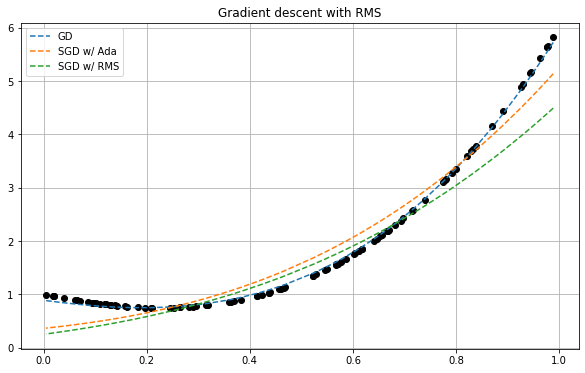

Beta GD  : [ 0.8899678  -1.30236027  2.18791342  4.12578495]
Beta SGD : [0.36199762 1.01648864 1.79468422 2.0873782 ]
Beta     : [ 1 -2  3  4]


In [6]:
# Add RMSprop and Adam to your library of methods for tuning the learning
# rate.
""" -> Stochastic gradient descent with RMS and ADAGRAD """
M        = 5            # size of each minibatch
n_epochs = N//M         # 
m        = int(n/M)     # number of minibatches
eta      = 1e1          # learning rate
delta    = 1e-1
rho      = 0.5

#beta_SGD = np.zeros((4,N))
#beta_SGD[:,0] = init_value
beta_SGD_ADA = np.array([1., 1., 1., 1.]) #np.random.randn(4)

# Including AdaGrad parameter to avoid possible division by zero
for epoch in tqdm(range(n_epochs)):
    # The outer product is calculated from scratch for each epoch
    Giter = np.zeros(shape=(4,4))
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X_rand[random_index:random_index+M]
        yi = y_rand[random_index:random_index+M]
        
        gradients = (1.0/M)*C_grad(beta_SGD_ADA, xi, yi)
        # Calculate the outer product of the gradients
        G0 = Giter
        Giter += gradients @ gradients.T
        G1 = (rho*G0+(1-rho)*Giter)
        # Simpler algorithm with only diagonal elements
        Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(G1)))]
        # compute update
        update = np.multiply(Ginverse.reshape(4), gradients)
        beta_SGD_ADA -= update
        
fig, ax = plt.subplots(figsize=figsize)

ax.plot(x, y, 'ko')
ax.plot(x, ytilde_GD, '--', label='GD')
ax.plot(x, ytilde_SGD, '--', label='SGD w/ Ada')

ytilde_SGD_ADA = X @ beta_SGD_ADA
ax.plot(x, ytilde_SGD_ADA, '--', label='SGD w/ RMS')

ax.grid(); ax.legend(); ax.set_title("Gradient descent with RMS")
plt.show()

print("Beta GD  :", beta_GD)
print("Beta SGD :", beta_SGD)
print("Beta     :", beta)